In [1]:
#Trying march 28, 6 to 630, now trying 630 to 7

In [1]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

In [2]:
import datetime
import pyaurorax
import matplotlib as plt

aurorax = pyaurorax.PyAuroraX()

In [3]:
# download an hour of RGB data
dataset_name = "TREX_RGB_RAW_NOMINAL"
start_dt = datetime.datetime(2022, 2, 20, 0, 55) #find date, time, and station
end_dt = datetime.datetime(2022, 2, 20, 1, 50)
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid="gill")

In [4]:
# read in the hour of data
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5)

In [5]:
# set up working with the tools by just making a shorter name for our future calls
at = aurorax.tools

In [6]:
# scale all the images
#
# NOTE: you can scale all images or just one image. Because RGB data is pretty
# large, we are going to try and save some RAM when scaling the data. We use
# the `memory_saver` option for this. Note that this flag results in a slower
# scaling routine, but uses considerably less memory.

#NOTE: Min down: much brighter, max up: much darker
#NOTE: 'memory_saver' is the frame you want to observe, and it is in a range respective to your given time frame. Usually 20 frames/minute
images_scaled = at.scale_intensity(data.data, min=5, max=50, memory_saver=True)

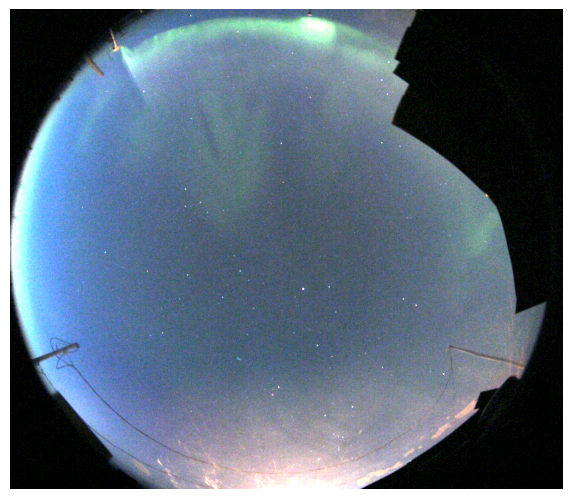

In [7]:
at.display(images_scaled[:, :, :, 100])

GENERATE A KEOGRAM

In [8]:
images_scaled.shape

(480, 553, 3, 1120)

In [9]:
keogram = at.keogram.create(images_scaled, data.timestamp)

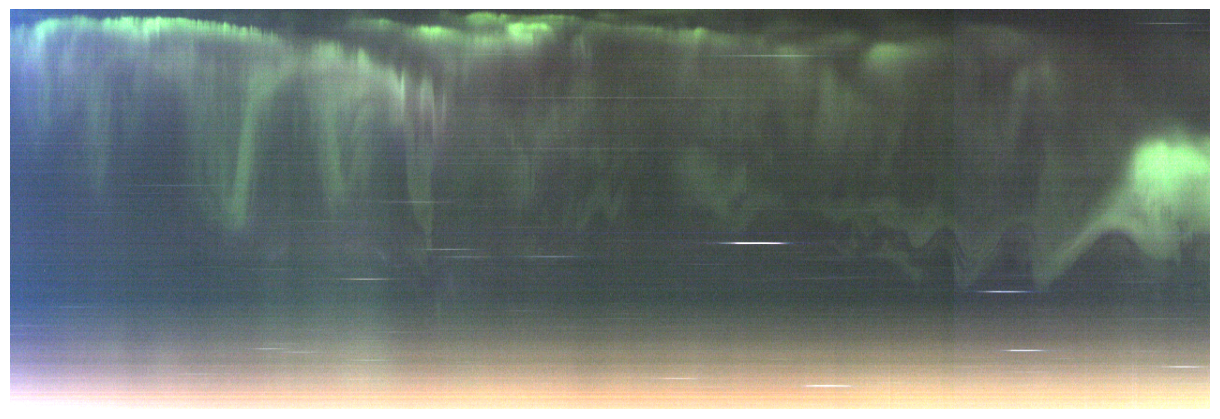

In [10]:
at.display(keogram.data, figsize=(12, 4), aspect="auto")
#figsize(n, i) where n is the length and i is the height of your image

In [11]:
#CREATE YOUR TITLE FOR YOUR PLOTS
title="TREx RGB Gillam %s"

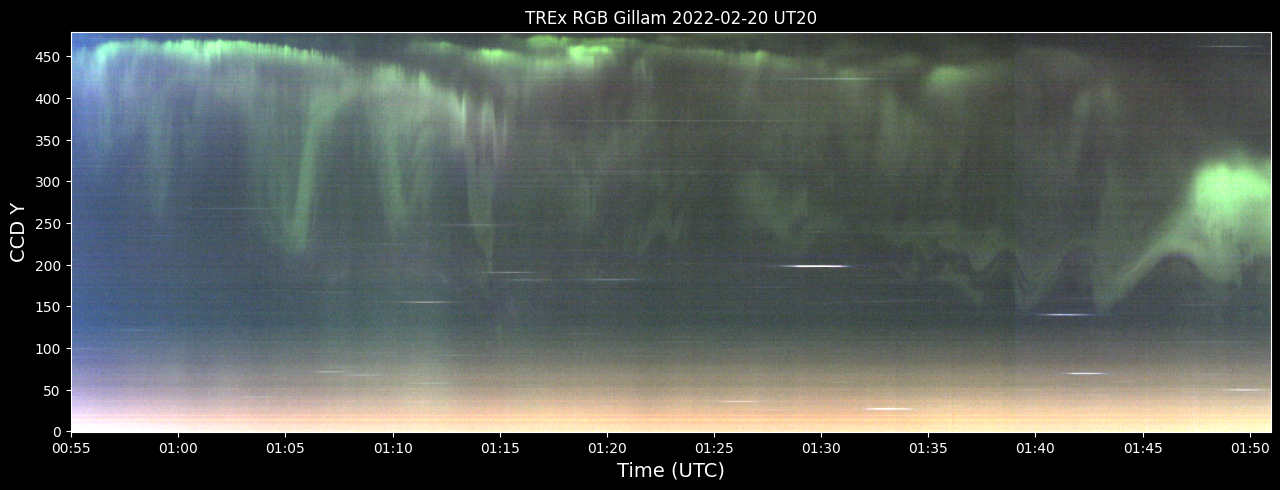

In [12]:
at.set_theme("dark")
plot_dt = start_dt  # this gets changed later, so we'll capture it now
keogram.plot(
    title=title % (plot_dt.strftime("%Y-%m-%d UT%d")),
    figsize=(12, 4),
    aspect="auto",
)

In [13]:
keogram.plot

<bound method Keogram.plot of Keogram(data=array(dims=(480, 1120, 3), dtype=uint8), timestamp=[1120 datetime objects], ccd_y=array(480 values), mag_y=None, geo_y=None)>

Reference in geographic coordinates

In [14]:
# # download skymap files
# start_dt = datetime.datetime(2022, 2, 20)
# end_dt = datetime.datetime(2022, 2, 20)
# r = aurorax.data.ucalgary.download("TREX_RGB_RAW_NOMINAL", start_dt, end_dt, site_uid="gill", overwrite=True)
# r.filenames

In [15]:
# download skymap files
#Created once a year (variable) so intervals should be a couple years apart. 
#Use download best skymap function (see documentation in create mosaic multinetwork)
start_dt = datetime.datetime(2021, 9, 20)
end_dt = datetime.datetime(2023, 9, 20)
r = aurorax.data.ucalgary.download("TREX_RGB_SKYMAP_IDLSAV", start_dt, end_dt, site_uid="yknf", overwrite=True)
r.filenames

[PosixPath('/Users/arhulber/pyaurorax_data/TREX_RGB_SKYMAP_IDLSAV/yknf/yknf_20220913/rgb_skymap_yknf_20220913-+_v01.sav'),
 PosixPath('/Users/arhulber/pyaurorax_data/TREX_RGB_SKYMAP_IDLSAV/yknf/yknf_20230114/rgb_skymap_yknf_20230114-+_v01.sav')]

In [18]:
# we want to use the second last one, since that's for the time period of the data we're looking at
skymaps = aurorax.data.ucalgary.read(r.dataset, r.filenames[-2])
skymaps.data[0].pretty_print()

Skymap:
  filename               : /Users/arhulber/pyaurorax_data/TREX_RGB_SKYMAP_IDLSAV/yknf/yknf_20220913/rgb_skymap_yknf_20220913-+_v01.sav
  full_azimuth           : array(dims=(480, 553), dtype=>f4)
  full_elevation         : array(dims=(480, 553), dtype=>f4)
  full_map_altitude      : array(dims=(3,), dtype=>f4)
  full_map_latitude      : array(dims=(3, 481, 554), dtype=>f4)
  full_map_longitude     : array(dims=(3, 481, 554), dtype=>f4)
  generation_info        : SkymapGenerationInfo(...)
  get_precalculated_altitudes: <bound method Skymap.get_precalculated_altitudes of Skymap(project_uid=rgb, site_uid=yknf, imager_uid=rgb-08, site_map_latitude=62.519848, site_map_longitude=245.686966, ...)>
  imager_uid             : rgb-08
  project_uid            : rgb
  site_map_altitude      : 0.0
  site_map_latitude      : 62.519848
  site_map_longitude     : 245.68697
  site_uid               : yknf
  version                : v01


In [31]:
keogram.set_geographic_latitudes(skymaps.data[0], altitude_km = 120)

In [32]:
help(keogram.set_geographic_latitudes)

Help on method set_geographic_latitudes in module pyaurorax.tools.classes.keogram:

set_geographic_latitudes(skymap: pyucalgarysrs.data.classes.Skymap, altitude_km: Union[int, float, NoneType] = None) -> None method of pyaurorax.tools.classes.keogram.Keogram instance
    Set the geographic latitude values for this keogram, using the specified skymap 
    data. The data will be set to the geo_y attribute of this Keogram object, which
    can then be used for plotting and/or further analysis.
    
    Args:
        skymap (pyaurorax.data.ucalgary.Skymap): 
            The skymap object to use. This parameter is required.
    
        altitude_km (int): 
            The altitude to use, in kilometers. If not specified, it will use the default in the 
            skymap object. If the specified altitude is not valid, a ValueError will be raised.
    
    Returns:
        None. The Keogram object's `geo_y` attribute will be updated.
    
    Raises:
        ValueError: Issues with specified

In [33]:
keogram.plot(
    figsize=(12, 4),
    y_type="geo",
    aspect="auto",
    title="TREx RGB Gillam %s" % (plot_dt.strftime("%Y-%m-%d UT%d")),
    savefig = True, savefig_filename = 'Feb.20.2022.GU3.jpeg'
)

#savefig = True, savefig_filename = '8.8.2022.steve.keogram.geolat.jpeg'

In [22]:
keogram.set_magnetic_latitudes(skymaps.data[0], plot_dt, altitude=120)

TypeError: Keogram.set_magnetic_latitudes() got an unexpected keyword argument 'altitude'

In [60]:
keogram.plot(
    figsize=(12, 4),
    y_type="mag",
    aspect="auto",
    title="TREx RGB Lucky Lake %s" % (plot_dt.strftime("%Y-%m-%d UT%d")),
    savefig = True, savefig_filename = '3.28.2023.630to700.steve.keogram.maglat.jpeg'
)

#savefig = True, savefig_filename = '8.8.2022.steve.keogram.maglat.jpeg'


Save figure

In [ ]:
keogram.plot(savefig = True, savefig_filename = '2.20.2022.keogram.pyaurorax.jpeg')